In [28]:
from pathlib import Path
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np



In [29]:
import PIL

In [30]:
from PIL import Image

In [31]:
test_data = np.random.beta(1,1, size=(100, 100, 3))

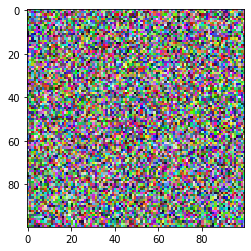

In [32]:
plt.imshow(test_data)

The image size is: (520, 347)


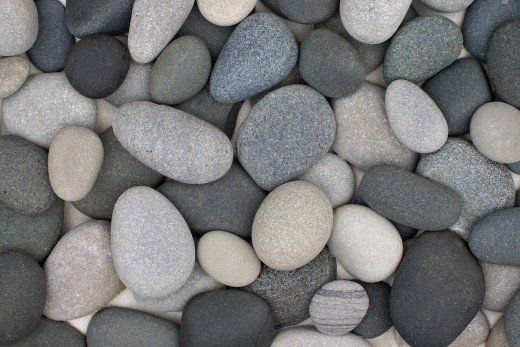

In [33]:
# open the image
img = Image.open('/Users/aslihankoksoy/Documents/IMAGES/pebbles.jpg')

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

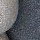

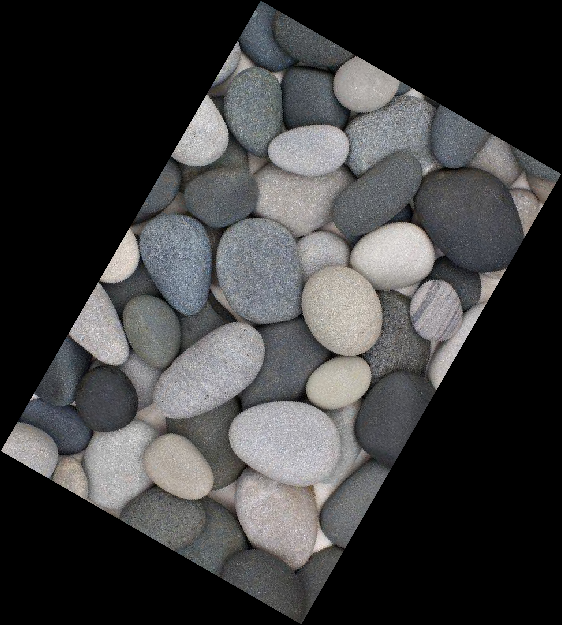

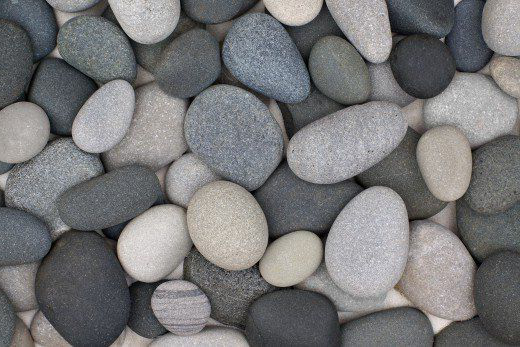

In [34]:
# Crop the image to 20, 20, 60, 60
img_cropped = img.crop([20, 20, 60, 60])
display(img_cropped)

# rotate the image by 60 degrees
img_rotated = img.rotate(60, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our NumPy array has the shape: (347, 520, 3)


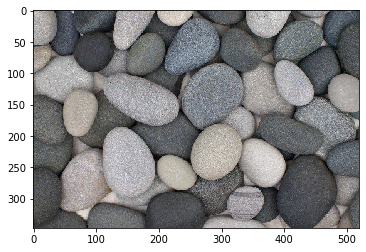

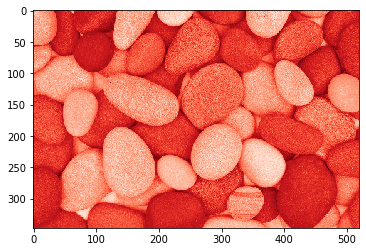

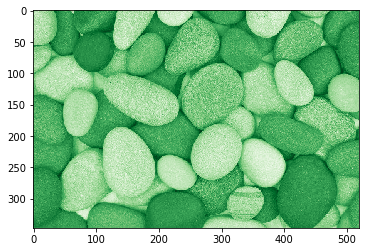

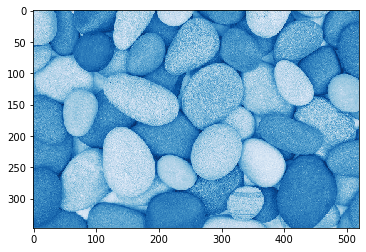

In [35]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow`
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()

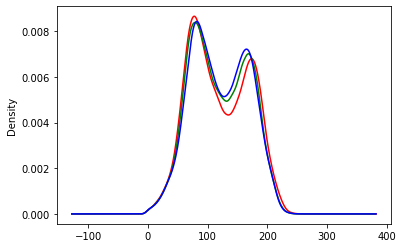

In [36]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)
        
    plt.show()

plot_rgb(img_data)

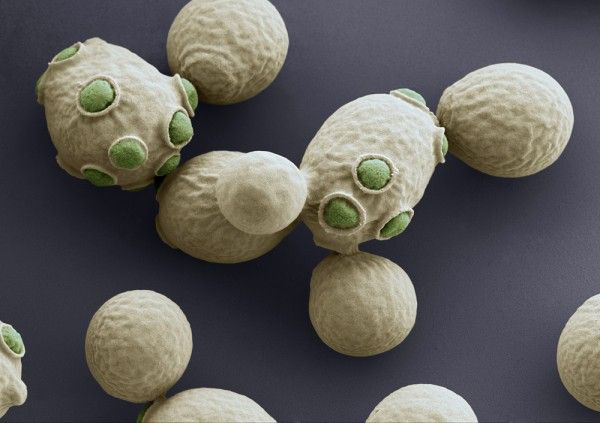

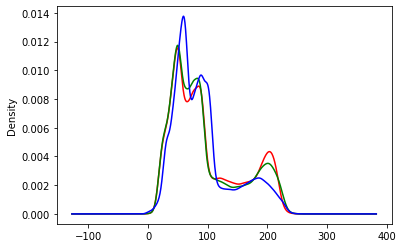

In [37]:
# load yeast img as yeast
yeast = Image.open('/Users/aslihankoksoy/Documents/IMAGES/yeastrgb.jpg')

# display the honey bee image
display(yeast)

# NumPy array of the honey bee image data
yeast_data = np.array(yeast)

# plot the rgb densities for the honey bee image
plot_rgb(yeast_data)

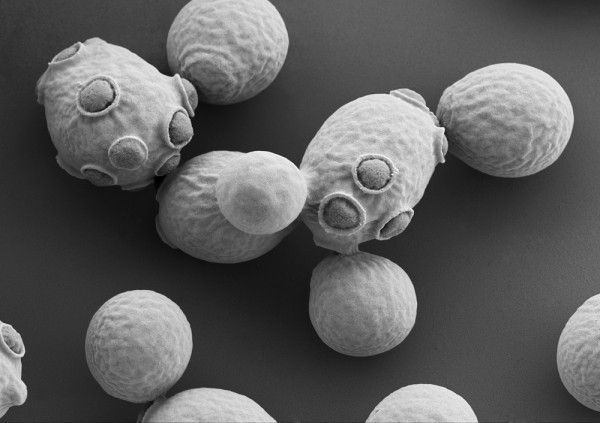

Our NumPy array has the shape: (423, 600)


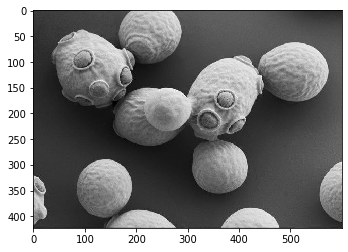

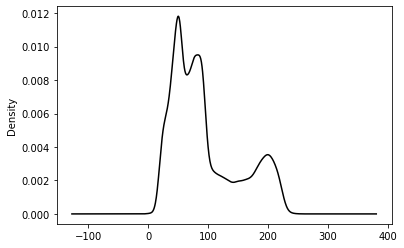

In [38]:
# convert to grayscale
yeast_grs = yeast.convert("L")
display(yeast_grs)

# convert the image to a NumPy array
yeast_grs_arr = np.array(yeast_grs)

# get the shape of the resulting array
yeast_grs_arr_shape = yeast_grs_arr.shape
print("Our NumPy array has the shape: {}".format(yeast_grs_arr_shape))

# plot the array using matplotlib
plt.imshow(yeast_grs_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(yeast_grs_arr, 'k')

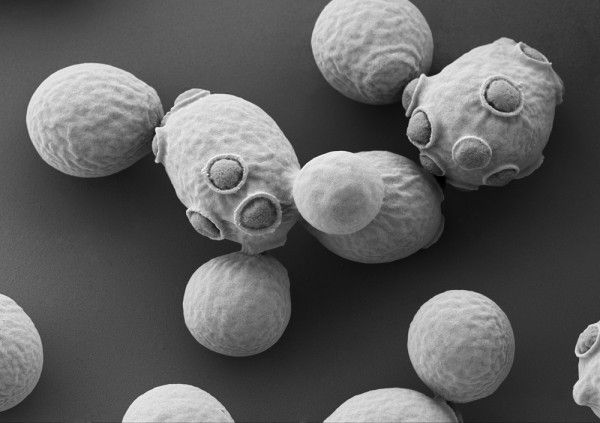

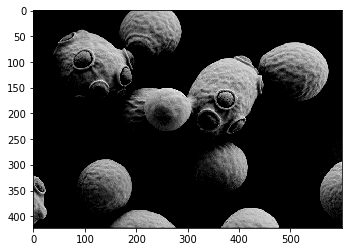

In [40]:
# flip the image left-right with transpose
yeast_grs_flip = yeast_grs.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(yeast_grs_flip)

# save the flipped image
yeast_grs_flip.save("/Users/aslihankoksoy/Documents/IMAGES/savedIMG/yeast_grs_flipped.jpg")

# create higher contrast by reducing range
yeast_hc_arr = np.maximum(yeast_grs_arr, 100)

# show the higher contrast version
plt.imshow(yeast_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
yeast_grs_hc = Image.fromarray(yeast_hc_arr)

# save the high contrast version
yeast_grs_hc.save("/Users/aslihankoksoy/Documents/IMAGES/savedIMG/yeast_grs_hc.jpg")